In [52]:
import pandas as pd
import numpy as np
#import copy

import specifics
import data

from time import time
#import xgboost
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
import scipy.stats as st # For parameter generation

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
train_feature_dataset = pd.DataFrame.from_csv('dataset/train.csv')
train_outcome_dataset = pd.DataFrame.from_csv('dataset/status_group.csv')
test_feature_dataset = pd.DataFrame.from_csv('dataset/test.csv')

In [54]:
train_feature_dataset.shape

(1010, 39)

In [55]:
train_feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 1 to 1252
Data columns (total 39 columns):
LOCATION                                                                                         1010 non-null object
TIME                                                                                             1010 non-null int64
GENDER                                                                                           1010 non-null object
Population (% of total)                                                                          1010 non-null float64
EDU_TERTIARY_PC_WKGPOP                                                                           956 non-null float64
CPI_AGRWTH                                                                                       932 non-null float64
GDP_USD_CAP                                                                                      956 non-null float64
GOV_SPEND_EDU                                                      

In [56]:
train_feature_dataset.head(5).iloc[:,0:20]

,LOCATION,TIME,GENDER,Population (% of total),EDU_TERTIARY_PC_WKGPOP,CPI_AGRWTH,GDP_USD_CAP,GOV_SPEND_EDU,%_Sanitation_Access,Access to Clean Fuels and Technologies for cooking (% of total population) 2.1_ACCESS.CFT.TOT,Access to electricity (% of rural population with access) 1.2_ACCESS.ELECTRICITY.RURAL,Access to electricity (% of total population) 1.1_ACCESS.ELECTRICITY.TOT,Access to electricity (% of urban population with access) 1.3_ACCESS.ELECTRICITY.URBAN,Energy intensity level of primary energy (MJ/2011 USD PPP) 6.1_PRIMARY.ENERGY.INTENSITY,Renewable electricity output (GWh) 4.1.2_REN.ELECTRICITY.OUTPUT,Renewable electricity share of total electricity output (%) 4.1_SHARE.RE.IN.ELECTRICITY,Renewable energy consumption (TJ) 3.1_RE.CONSUMPTION,Renewable energy share of TFEC (%) 2.1_SHARE.TOTAL.RE.IN.TFEC,Total electricity output (GWh) 4.1.1_TOTAL.ELECTRICITY.OUTPUT,Total final energy consumption (TFEC) (TJ) 1.1_TOTAL.FINAL.ENERGY.CONSUM
id,,,,,,,,,,,,,,,,,,,,
1,AUS,1993,MEN,49.780616,23.508869,1.753653,19929.78137,5.50922,100.0,100.0,100.0,100.0,100.0,7.502966,17220.0,10.55,197804.8632,8.616992,163236.0,2295520.952
2,AUS,1993,WOMEN,50.219384,21.418512,1.753653,19929.78137,5.50922,100.0,100.0,100.0,100.0,100.0,7.502966,17220.0,10.55,197804.8632,8.616992,163236.0,2295520.952
3,AUS,1994,MEN,49.762137,24.407070,1.969635,21134.14664,5.24752,100.0,100.0,100.0,100.0,100.0,7.206736,17042.0,10.19,193855.2090,8.259947,167169.0,2346930.376
4,AUS,1994,WOMEN,50.237863,21.740088,1.969635,21134.14664,5.24752,100.0,100.0,100.0,100.0,100.0,7.206736,17042.0,10.19,193855.2090,8.259947,167169.0,2346930.376
5,AUS,1995,MEN,49.758261,25.825409,4.627767,22098.57288,5.12905,100.0,100.0,100.0,100.0,100.0,7.076343,16631.0,9.62,199700.4005,8.217806,172805.0,2430093.957


In [57]:
train_feature_dataset.head(5).iloc[:,20:40]

,Population ages 00-04 (as % of specified gender population),Population ages 05-09 (as % of specified gender population),Population ages 10-14 (as % of specified gender population),Population ages 15-19 (as % of specified gender population),Population ages 20-24 (as % of specified gender population),Population ages 25-29 (as % of specified gender population),Population ages 30-34 (as % of specified gender population),Population ages 35-39 (as % of specified gender population),Population ages 40-44 (as % of specified gender population),Population ages 45-49 (as % of specified gender population),Population ages 50-54 (as % of specified gender population),Population ages 55-59 (as % of specified gender population),Population ages 60-64 (as % of specified gender population),Population ages 65-69 (as % of specified gender population),Population ages 70-74 (as % of specified gender population),Population ages 75-79 (as % of specified gender population),Population ages 80 and older (as % of specified gender population),TER_Enrolment_rate,GNI per capita Atlas method (current US$)
id,,,,,,,,,,,,,,,,,,,
1,7.483406,7.526700,7.381224,7.674855,8.114461,7.977674,8.245478,7.849939,7.496966,6.676347,5.125739,4.363110,4.022097,3.744820,2.825824,1.831723,1.659637,65.428513,18930
2,7.050943,7.102381,6.945377,7.259318,7.834311,7.855364,8.166469,7.807832,7.363331,6.375044,4.874607,4.220368,4.009922,3.997684,3.396483,2.549315,3.191249,64.678619,18930
3,7.480330,7.450865,7.402882,7.432178,8.106997,7.815958,8.206122,7.896834,7.440257,6.916593,5.260645,4.417681,3.955058,3.738131,2.914956,1.854255,1.710258,66.160980,18890
4,7.043296,7.025230,6.968273,7.011528,7.811970,7.702864,8.134269,7.848636,7.352638,6.627319,5.003437,4.267955,3.941137,3.942406,3.479801,2.549259,3.289984,66.824181,18890
5,7.436000,7.389884,7.399023,7.274438,8.023982,7.709084,8.131212,7.926613,7.430364,7.073719,5.448858,4.480351,3.926157,3.716121,2.988446,1.905839,1.739907,68.701340,19320


In [58]:
data = specifics.build_data(train_feature_df = train_feature_dataset, 
                            train_outcome_df = train_outcome_dataset, 
                            test_feature_df = test_feature_dataset)

In [59]:
data.train_feature_df.shape

(1010, 38)

In [60]:
data.test_feature_df.shape

(242, 38)

In [61]:
pd.set_option('display.max_rows', 3000)
list(data.train_feature_df.columns.values)[0:3000]

['TIME',
 'Population (% of total)',
 'EDU_TERTIARY_PC_WKGPOP',
 'CPI_AGRWTH',
 'GDP_USD_CAP',
 'GOV_SPEND_EDU',
 '%_Sanitation_Access',
 'Access to Clean Fuels and Technologies for cooking (% of total population) 2.1_ACCESS.CFT.TOT',
 'Access to electricity (% of rural population with access) 1.2_ACCESS.ELECTRICITY.RURAL',
 'Access to electricity (% of total population) 1.1_ACCESS.ELECTRICITY.TOT',
 'Access to electricity (% of urban population with access) 1.3_ACCESS.ELECTRICITY.URBAN',
 'Energy intensity level of primary energy (MJ/2011 USD PPP) 6.1_PRIMARY.ENERGY.INTENSITY',
 'Renewable electricity output (GWh) 4.1.2_REN.ELECTRICITY.OUTPUT',
 'Renewable electricity share of total electricity output (%) 4.1_SHARE.RE.IN.ELECTRICITY',
 'Renewable energy consumption (TJ) 3.1_RE.CONSUMPTION',
 'Renewable energy share of TFEC (%) 2.1_SHARE.TOTAL.RE.IN.TFEC',
 'Total electricity output (GWh) 4.1.1_TOTAL.ELECTRICITY.OUTPUT',
 'Total final energy consumption (TFEC) (TJ) 1.1_TOTAL.FINAL.ENER

In [62]:
assert sum(data.train_feature_df.index == data.train_outcome_df.index) == len(data.train_feature_df)

### Check if there is a value in testset set as -9999 but the corresponsing col in trainset never has -9999

In [258]:
data.train_feature_df.min()

TIME                                                                                              1993.000000
Population (% of total)                                                                             45.791263
EDU_TERTIARY_PC_WKGPOP                                                                               7.007294
CPI_AGRWTH                                                                                          -4.478103
GDP_USD_CAP                                                                                       9390.760261
GOV_SPEND_EDU                                                                                        2.863940
%_Sanitation_Access                                                                                 62.300000
Access to Clean Fuels and Technologies for cooking (% of total population) 2.1_ACCESS.CFT.TOT       81.565164
Access to electricity (% of rural population with access) 1.2_ACCESS.ELECTRICITY.RURAL              59.883015
Access to 

In [259]:
data.test_feature_df.min()

TIME                                                                                               1993.000000
Population (% of total)                                                                              48.947421
EDU_TERTIARY_PC_WKGPOP                                                                               10.656567
CPI_AGRWTH                                                                                           -1.736046
GDP_USD_CAP                                                                                       12522.285890
GOV_SPEND_EDU                                                                                         2.898640
%_Sanitation_Access                                                                                  78.600000
Access to Clean Fuels and Technologies for cooking (% of total population) 2.1_ACCESS.CFT.TOT        83.870156
Access to electricity (% of rural population with access) 1.2_ACCESS.ELECTRICITY.RURAL               95.113190
A

# Random Forest Regressor

In [126]:
# build a classifier
reg = RandomForestRegressor(n_jobs = -1)
        
# use a full grid over all parameters
params = {"max_depth": [15, 20, 25, 30],
          "min_samples_leaf": [2, 3, 4],
          "min_samples_split": [0.04, 0.03, 0.02, 0.01],
          "n_estimators": [100, 150, 200],
          "criterion": ['mse']
         }

# run RandomizedSearchCV
rand_search = RandomizedSearchCV(reg, params, cv = 3, n_jobs=-1, n_iter=12)
start = time()
rand_search.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rand_search.grid_scores_)))

GridSearchCV took 21.91 seconds for 12 candidate parameter settings.


C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [127]:
rand_search.grid_scores_

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.36838, std: 0.20902, params: {'n_estimators': 150, 'min_samples_split': 0.03, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'mse'},
 mean: -0.32594, std: 0.13028, params: {'n_estimators': 200, 'min_samples_split': 0.03, 'min_samples_leaf': 4, 'max_depth': 15, 'criterion': 'mse'},
 mean: -0.42090, std: 0.24426, params: {'n_estimators': 100, 'min_samples_split': 0.04, 'min_samples_leaf': 3, 'max_depth': 25, 'criterion': 'mse'},
 mean: -0.42874, std: 0.27780, params: {'n_estimators': 150, 'min_samples_split': 0.03, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'mse'},
 mean: -0.43559, std: 0.27153, params: {'n_estimators': 200, 'min_samples_split': 0.04, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'mse'},
 mean: -0.43970, std: 0.19346, params: {'n_estimators': 100, 'min_samples_split': 0.04, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'mse'},
 mean: -0.37802, std: 0.21315, params: {'n_estimators': 150, 'min_samples_split': 0.04, 'min_samples_leaf'

In [83]:
rand_search.best_params_

{'criterion': 'mse',
 'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 0.02,
 'n_estimators': 100}

In [242]:
regressor = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_leaf=4, min_samples_split = 0.03)
regressor.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=0.03,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [243]:
preds_regressor = pred_to_df(regressor, data.train_feature_df)        #Visulize training data
preds_regressor.columns = ['Prediction']

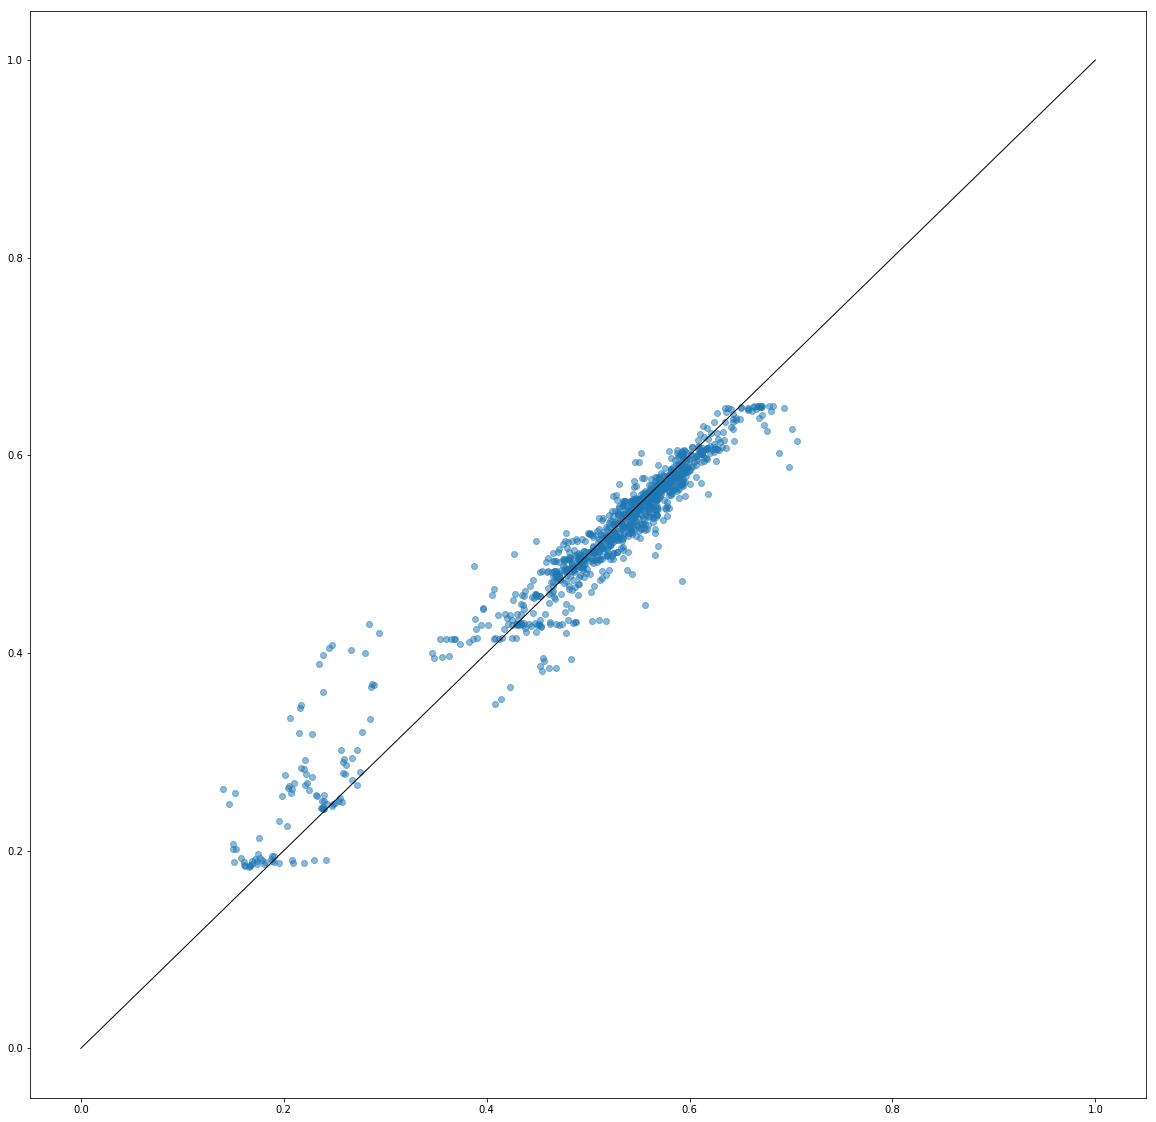

In [244]:
plt.figure(figsize=(20, 20))

plt.scatter(data.train_outcome_df, preds_regressor, alpha= 0.5)

plt.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=1)
plt.show()

In [245]:
MSE = mean_squared_error(data.train_outcome_df, preds_regressor)
MSE ** 0.5

0.02861343514598411

In [ ]:
prediction = pred_to_df(regressor, data.test_feature_df) 
prediction.to_csv('result.csv', sep='\t', index = False)

# XGBOOST TREE WITH UNFILLED DATA

In [64]:
params = {
    "n_estimators": [40, 50, 60],
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.001, 0.01),
    #"learning_rate": st.uniform(0.006, 0.006),
    "colsample_bytree": st.uniform(0.60, 0.40),
    #"colsample_bytree": st.uniform(0.80, 0.20),
    "subsample": st.uniform(0.7, 0.3),
    "gamma": st.uniform(0.2, 1.6),
    #"gamma": st.uniform(0.2, 0.3),
    "min_child_weight": [0,1,2,3,4,5],
    "max_delta_step": [0, 1, 2, 3,4]
}

model = XGBRegressor(n_jobs = -1) # nthread deprecated

gs = RandomizedSearchCV(model, params, n_jobs=-1, n_iter=200, cv = 10)

gs.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [40, 50, 60], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A2F657B668>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A2F657B7B8>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen ob...t at 0x000001A2F657BC88>, 'min_child_weight': [0, 1, 2, 3, 4, 5], 'max_delta_step': [0, 1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [65]:
gs.grid_scores_

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.39539, std: 0.69091, params: {'colsample_bytree': 0.6929986560846283, 'gamma': 1.1661138379597784, 'learning_rate': 0.0039979549893095273, 'max_delta_step': 3, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.9120796563686806},
 mean: -0.34734, std: 0.60920, params: {'colsample_bytree': 0.87223361250671383, 'gamma': 0.77307471800295491, 'learning_rate': 0.0034124857618450036, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 60, 'subsample': 0.74106587411041636},
 mean: -0.37146, std: 0.71841, params: {'colsample_bytree': 0.88448810126464705, 'gamma': 0.55140828109191431, 'learning_rate': 0.0061699876913751464, 'max_delta_step': 2, 'max_depth': 20, 'min_child_weight': 0, 'n_estimators': 40, 'subsample': 0.99639406490536575},
 mean: -0.38953, std: 0.53407, params: {'colsample_bytree': 0.87353400834748351, 'gamma': 0.74292498627410075, 'learning_rate': 0.0016680076948038238, 'max_delta_step': 2, 'max_depth': 27, 'min_child_wei

In [213]:
gs.best_params_

{'colsample_bytree': 0.72354792937343382,
 'gamma': 0.93450310230643563,
 'learning_rate': 0.0073858407201836465,
 'max_delta_step': 3,
 'max_depth': 25,
 'min_child_weight': 0,
 'n_estimators': 50,
 'subsample': 0.96619603436441204}

In [13]:
# This is the winner setting that produced 0.08891 score.
best_model = XGBRegressor(
    colsample_bytree = 0.9900243815567773,
    gamma = 0.42560064902898453,
    learning_rate = 0.010976497428325942,
    max_depth = 26,
    n_estimators = 50,
    subsample = 0.72772456173363298,
    min_child_weight = 2,
    max_delta_step = 2,
    n_jobs = -1    
)

In [21]:
# This is the loser setting from 3 fold CV fine tuned.
best_model = XGBRegressor(
    colsample_bytree = 0.983780377,
    gamma = 0.205634573,
    learning_rate = 0.009908466,
    max_depth = 28,
    n_estimators = 60,
    subsample = 0.81693462,
    min_child_weight = 3,
    max_delta_step = 4,
    n_jobs = -1    
)

In [49]:
# This is the winner from 10 fold CV.
best_model = XGBRegressor(
    colsample_bytree = 0.981181319,
    gamma = 1.296090886,
    learning_rate = 0.010996929,
    max_depth = 16,
    n_estimators = 60,
    subsample = 0.93320205,
    min_child_weight = 5,
    max_delta_step = 1,
    n_jobs = -1    
)

In [63]:
best_model.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.981181319, gamma=1.296090886,
       learning_rate=0.010996929, max_delta_step=1, max_depth=16,
       min_child_weight=5, missing=None, n_estimators=60, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.93320205)

In [26]:
train_prediction = best_model.predict(data.train_feature_df)

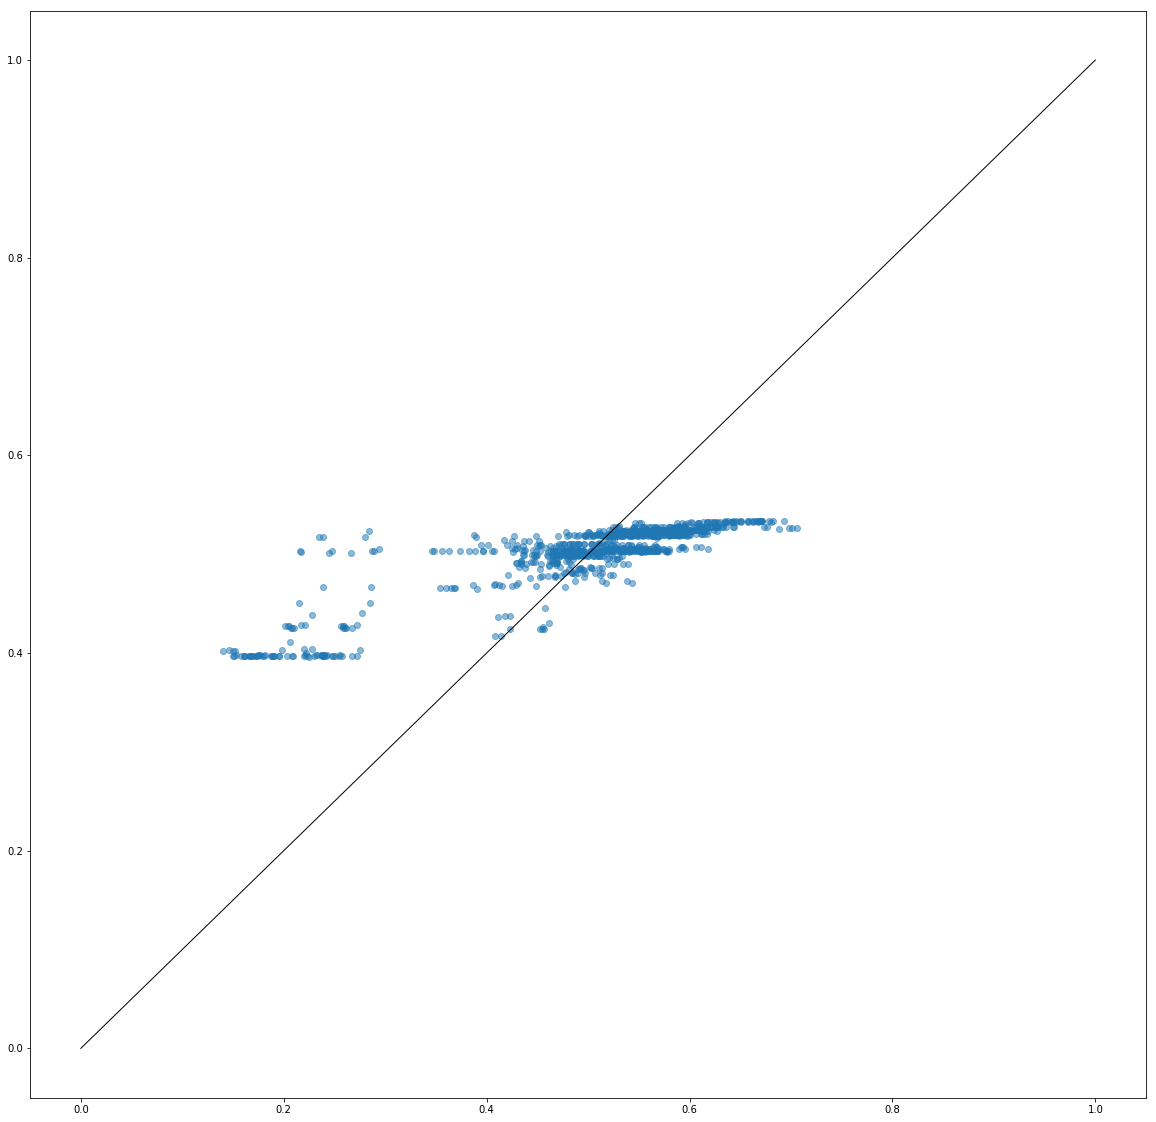

In [229]:
plt.figure(figsize=(20, 20))

plt.scatter(data.train_outcome_df, train_prediction, alpha= 0.5)

plt.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=1)
plt.show()

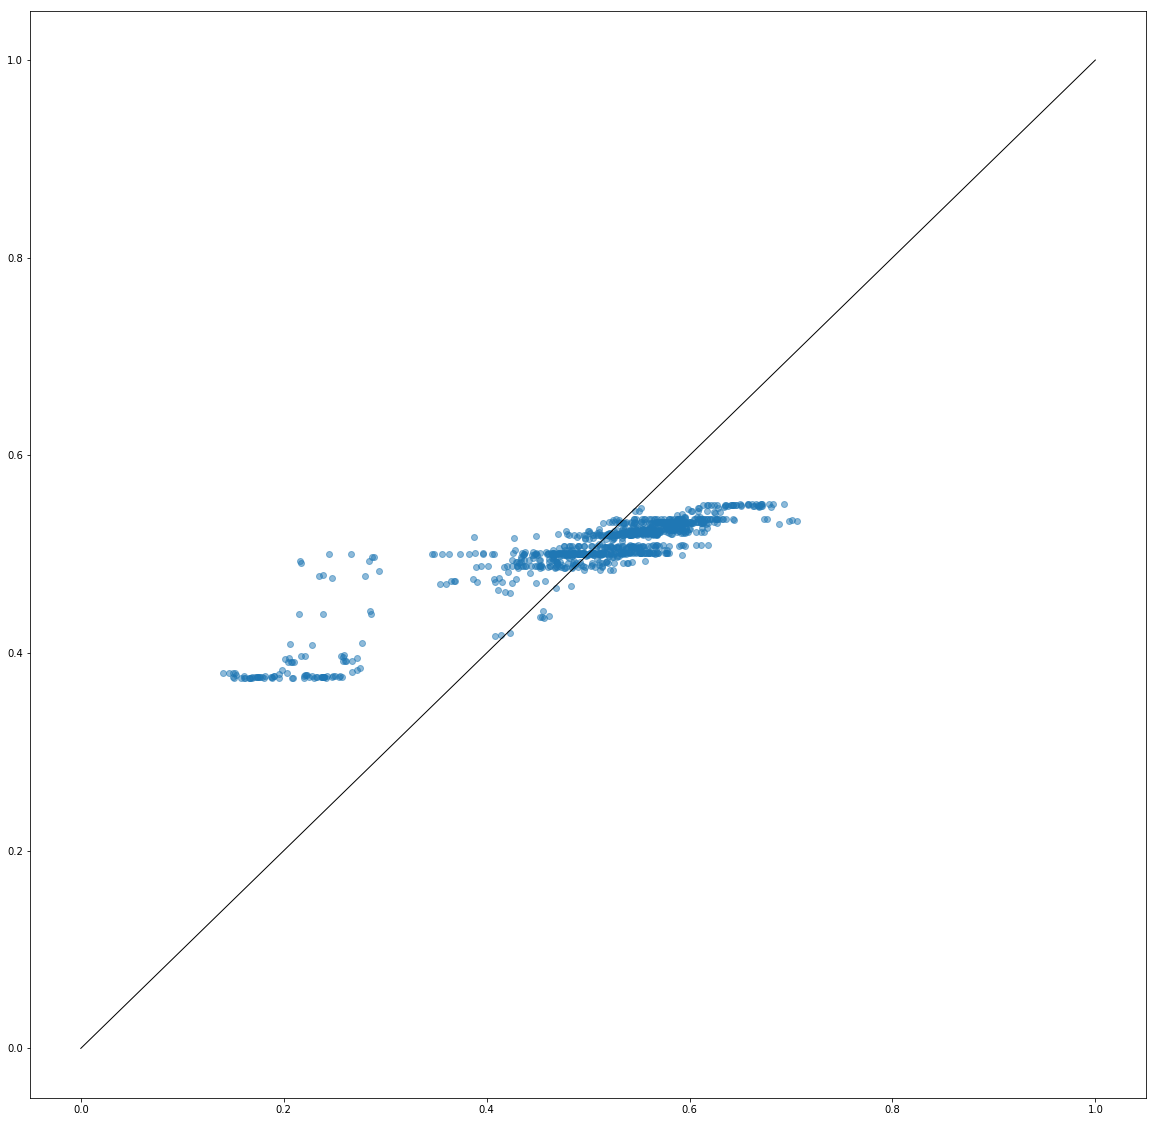

In [27]:
plt.figure(figsize=(20, 20))

plt.scatter(data.train_outcome_df, train_prediction, alpha= 0.5)

plt.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=1)
plt.show()

In [231]:
MSE = mean_squared_error(data.train_outcome_df, train_prediction)
MSE ** 0.5

0.083830669705594663

In [28]:
MSE = mean_squared_error(data.train_outcome_df, train_prediction)
MSE ** 0.5

0.075812171452828578

In [51]:
prediction = best_model.predict(data.test_feature_df)
pd.DataFrame(prediction).to_csv('result.csv', sep='\t', index = False)

# XGBOOST TREE WITH FILLED DATA

In [276]:
params = {
    "n_estimators": [100],
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.001, 0.015),
    "colsample_bytree": st.uniform(0.60, 0.40),
    "subsample": st.uniform(0.7, 0.3),
    "gamma": st.uniform(0.01, 0.2),
    "min_child_weight": [0,1,2,3,4],
    "max_delta_step": [0, 1, 2, 3]
}

model = XGBRegressor(n_jobs = -1) # nthread deprecated

gs = RandomizedSearchCV(model, params, n_jobs=-1, n_iter=100)

gs.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000228741782E8>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000228741784E0>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at... object at 0x0000022874648828>, 'min_child_weight': [0, 1, 2, 3, 4], 'max_delta_step': [0, 1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
      

In [272]:
params = {
    "n_estimators": [50],
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.006, 0.015),
    "colsample_bytree": st.uniform(0.60, 0.40),
    "subsample": st.uniform(0.7, 0.3),
    "gamma": st.uniform(0.05, 0.3),
    "min_child_weight": [0,1,2,3,4],
    "max_delta_step": [0, 1, 2, 3]
}

model = XGBRegressor(n_jobs = -1) # nthread deprecated

gs = RandomizedSearchCV(model, params, n_jobs=-1, n_iter=50)

gs.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [50], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002287476BEB8>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002287476B080>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at ... object at 0x0000022874195C18>, 'min_child_weight': [0, 1, 2, 3, 4], 'max_delta_step': [0, 1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
       

In [ ]:
gs.grid_scores_

In [278]:
# Best tune for 100 trees
best_model = XGBRegressor(
    colsample_bytree = 0.92582933,
    gamma = 0.07147378,
    learning_rate = 0.007187103,
    max_depth = 15,
    n_estimators = 100,
    subsample = 0.758763799,
    min_child_weight = 1,
    max_delta_step = 0,
    n_jobs = -1    
)

In [297]:
# Best tune for 50 trees
best_model = XGBRegressor(
    colsample_bytree = 0.859649548,
    gamma = 0.16621314,
    learning_rate = 0.011236507,
    max_depth = 24,
    n_estimators = 50,
    subsample = 0.728027392,
    min_child_weight = 1,
    max_delta_step = 1,
    n_jobs = -1    
)

In [66]:
# Best tune from 10 CV
best_model = XGBRegressor(
    colsample_bytree = 0.905885124,
    gamma = 1.06660232,
    learning_rate = 0.010169538,
    max_depth = 24,
    n_estimators = 50,
    subsample = 0.728831731,
    min_child_weight = 2,
    max_delta_step = 2,
    n_jobs = -1    
)

In [67]:
best_model.fit(data.train_feature_df, data.train_outcome_df.iloc[:,0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.905885124, gamma=1.06660232,
       learning_rate=0.010169538, max_delta_step=2, max_depth=24,
       min_child_weight=2, missing=None, n_estimators=50, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.728831731)

In [68]:
prediction = best_model.predict(data.test_feature_df)
pd.DataFrame(prediction).to_csv('result.csv', sep='\t', index = False)

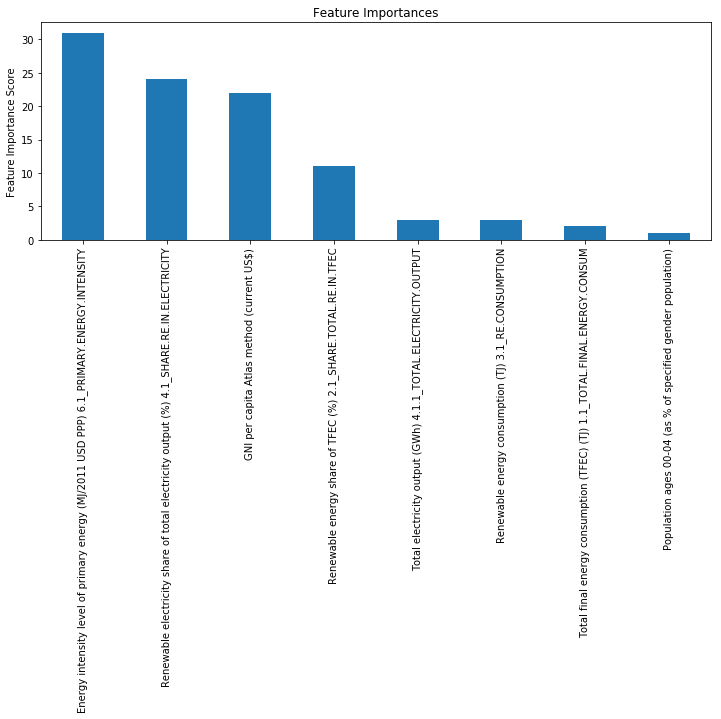

In [69]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(best_model._Booster.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [70]:
feat_imp.head(200)

Energy intensity level of primary energy (MJ/2011 USD PPP) 6.1_PRIMARY.ENERGY.INTENSITY    31
Renewable electricity share of total electricity output (%) 4.1_SHARE.RE.IN.ELECTRICITY    24
GNI per capita Atlas method (current US$)                                                  22
Renewable energy share of TFEC (%) 2.1_SHARE.TOTAL.RE.IN.TFEC                              11
Total electricity output (GWh) 4.1.1_TOTAL.ELECTRICITY.OUTPUT                               3
Renewable energy consumption (TJ) 3.1_RE.CONSUMPTION                                        3
Total final energy consumption (TFEC) (TJ) 1.1_TOTAL.FINAL.ENERGY.CONSUM                    2
Population ages 00-04 (as % of specified gender population)                                 1
dtype: int64

In [71]:
len(best_model._Booster.get_score())

8

In [72]:
len(best_model._Booster.get_fscore())

8

In [317]:
data.train_feature_df['TIME'].max()

2016.0

In [ ]:
# Get the ratio data or per capita, so no need to normalise
# How to create country happiness "intercept"?
# How about the trend someone experienced?

In [ ]:
# Can unfilled data trained model (0.08891) be finer tuned?
# Answer: Although the RMSE on the total training (this is cheating) dropped from 0.0838 to 0.0758, the test score
# of finer tuned model got worsen. I consider this as too much tuning resulted in a setting that seemed good,
# but suffer from "p-value hacking" related problems.
# 
# Can more than 3 fold CV help to resolve the previous problem?
# Answer: Did 10 fold CV. A big jump in test accuracy. Refreshed my record.
#
# Can missing value filled test/train data do any good?
# Answer: If fill test only: in submission NO 3, filled test data won. In submission NO 2, they tied.
#         If fill both test and train: if 10 fold CV not 3 fold CV, slightly better result (RMSE from 0.0826 to 0.08209)
